# K-Means

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('df_processed.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Month,DayofWeek,Is_Weekend,Season,PM2.5_to_PM10_Ratio
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,Moderate,1,3,0,Winter,0.50763
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,Moderate,1,4,0,Winter,0.50763
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,Moderate,1,5,1,Winter,0.50763
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,Moderate,1,6,1,Winter,0.50763
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,Moderate,1,0,0,Winter,0.50763


In [9]:
# Select the features for clustering
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
X = df[features]
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89


In [10]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [12]:
from sklearn.cluster import KMeans

In [13]:
# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

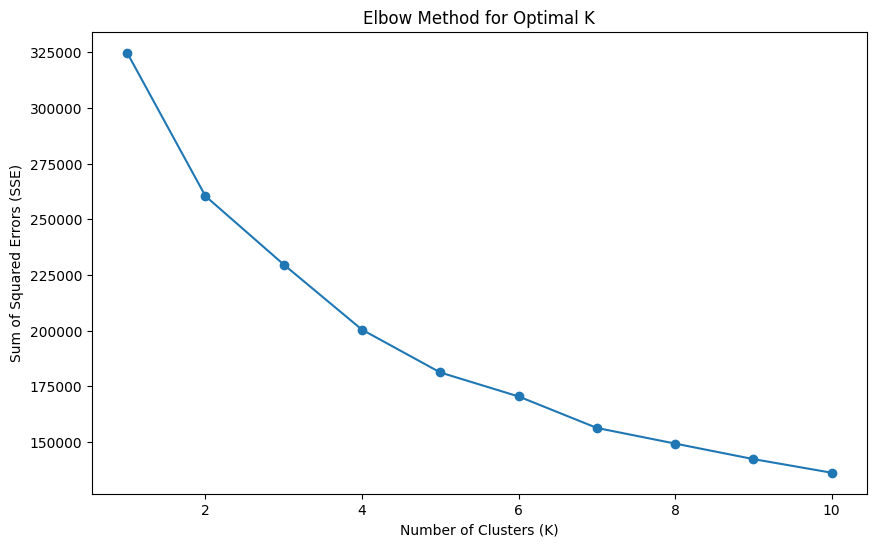

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [15]:
# Perform K-Means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

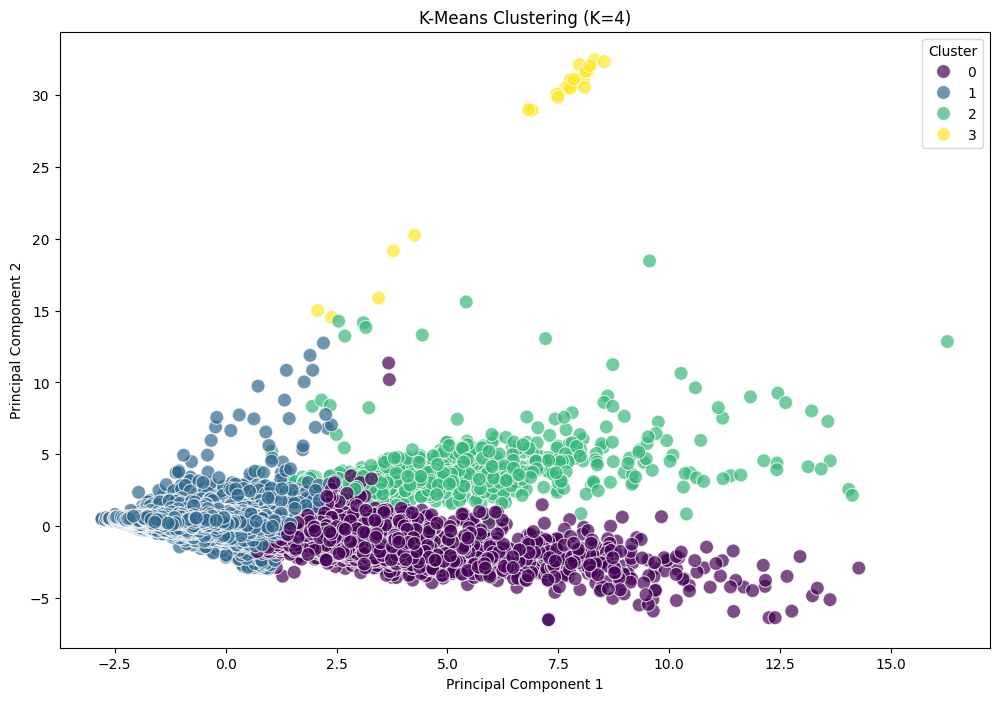

In [16]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering (K=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Mean Pollutant Values for Each Cluster:
              PM2.5        PM10         NO        NO2        NOx        NH3  \
Cluster                                                                       
0        155.079745  219.071309  52.332474  55.442911  79.413106  31.456568   
1         50.877244   93.761085  10.894967  21.843384  22.887099  19.425866   
2         39.797714   59.542571   3.429714   7.660286   6.546857   9.102286   
3         74.350012  104.960391  32.116349  83.486716  64.213040  15.810464   

                CO        SO2         O3     Benzene     Toluene  
Cluster                                                           
0         1.871246  16.986671  41.595726    4.476633   12.620263  
1         1.204646  11.224781  32.550849    1.951113    4.789549  
2         3.512286   9.864000  40.592571  359.588857  302.522857  
3        32.334969  79.341758  43.573468    8.077875   41.620183  


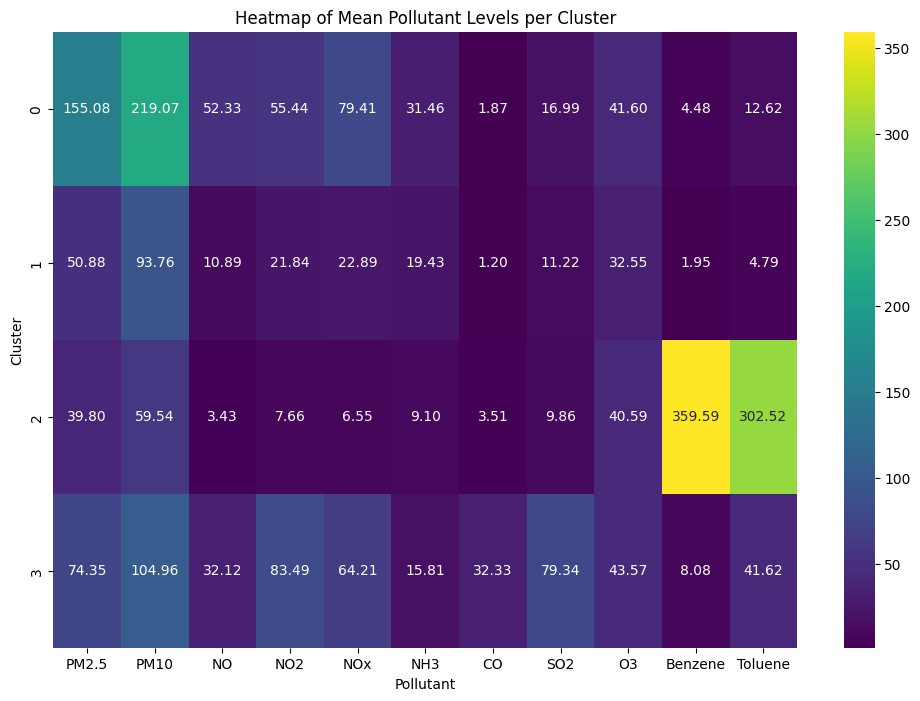

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Data and Perform Clustering ---

# Load the processed dataframe
df = pd.read_csv('df_processed.csv')

# Select the features for clustering
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
X = df[features].copy() # Use .copy() to avoid SettingWithCopyWarning

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# --- Step 2: Analyze and Visualize the Clusters ---

# Group by the new 'Cluster' column and calculate the mean for all features
# We use the original (unscaled) data for interpretation
cluster_analysis = df.groupby('Cluster')[features].mean()

print("Mean Pollutant Values for Each Cluster:")
print(cluster_analysis)


# --- Step 3: Create a Heatmap for Easy Interpretation ---

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_analysis, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Mean Pollutant Levels per Cluster')
plt.ylabel('Cluster')
plt.xlabel('Pollutant')
plt.show()

Which cells are the brightest (highest values)? A bright cell for "Cluster 2" in the "PM2.5" column means that the days belonging to Cluster 2 have, on average, very high PM2.5 levels.

What is the "personality" of each cluster row?

Example 1: Cluster "High Particulate Matter"

Look for a row (a cluster) where PM2.5 and PM10 are significantly higher than in other clusters. This cluster represents days with heavy particulate pollution.

Example 2: Cluster "High Gaseous Pollution"

Look for another row where pollutants like NO, NO2, NOx, CO, and SO2 are the brightest. This cluster likely represents days with high pollution from vehicle exhaust and industrial emissions.

Example 3: Cluster "High Ozone"

You might find a cluster where O3 (Ozone) is the dominant high value. Ozone is often formed in sunny conditions from other pollutants, so this could represent sunny, smoggy days.

Example 4: Cluster "Clean Days"

There will likely be a cluster where most of the values are low (darker colors). This represents the days with the best air quality.

City vs. Cluster Distribution (Number of Days):
Cluster                0     1   2    3
City                                   
Ahmedabad             11  1230   1  767
Aizawl                 0   113   0    0
Amaravati             19   932   0    0
Amritsar             105  1116   0    0
Bengaluru             17  1980   4    8
Bhopal                23   266   0    0
Brajrajnagar          56   880   2    0
Chandigarh             2   302   0    0
Chennai               11  1995   2    1
Coimbatore             0   386   0    0
Delhi               1218   791   0    0
Ernakulam             12   150   0    0
Gurugram             302  1376   0    1
Guwahati             113   389   0    0
Hyderabad             19  1987   0    0
Jaipur               160   954   0    0
Jorapokhar            24  1134   0   11
Kochi                 50   112   0    0
Kolkata              249   565   0    0
Lucknow              317  1668   1   23
Mumbai               199  1808   0    2
Patna                533  1319  

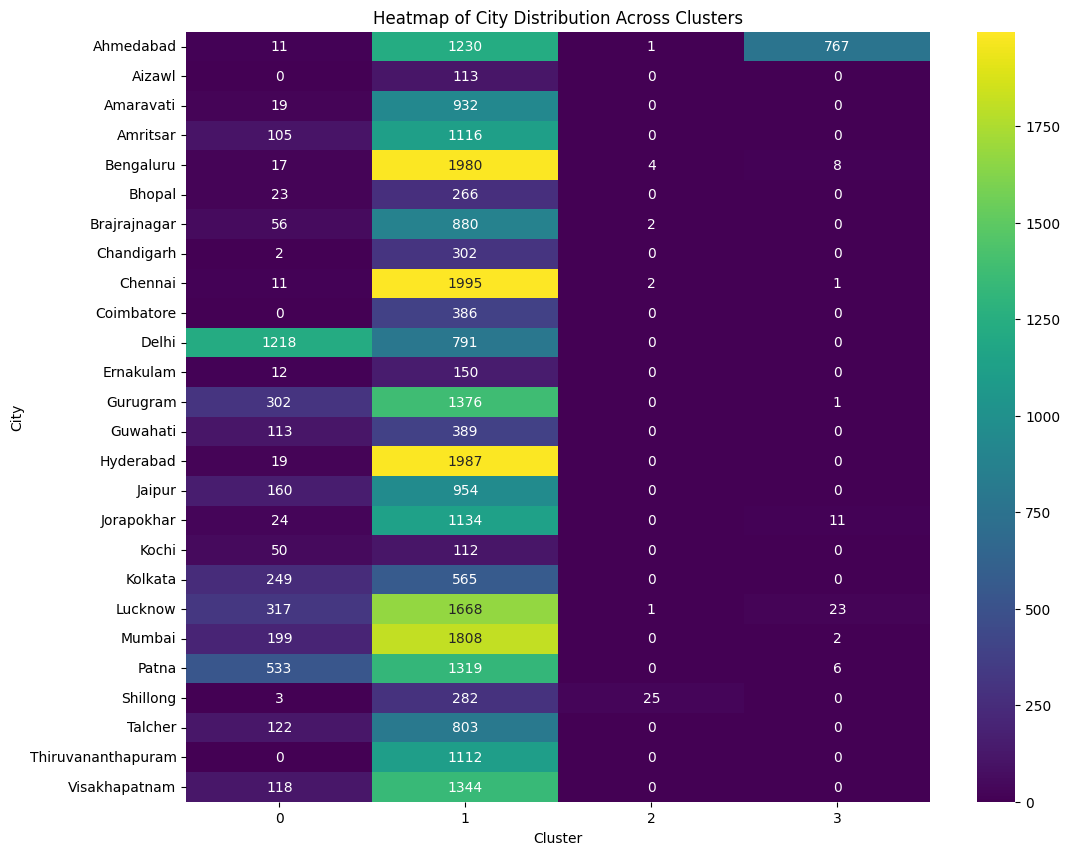

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Data and Perform Clustering ---

# Load the processed dataframe
df = pd.read_csv('df_processed.csv')

# Select the features for clustering
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
X = df[features].copy() # Use .copy() to avoid potential warnings

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering with K=4 and add the labels to the dataframe
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# --- Step 2: Analyze and Visualize the City Distribution ---

# Create a cross-tabulation table.
# This counts how many days for each city fall into each cluster.
city_cluster_crosstab = pd.crosstab(df['City'], df['Cluster'])

print("City vs. Cluster Distribution (Number of Days):")
print(city_cluster_crosstab)


# --- Step 3: Create a Heatmap for a Clear Visual ---

plt.figure(figsize=(12, 10))
sns.heatmap(city_cluster_crosstab, cmap='viridis', annot=True, fmt='d') # fmt='d' ensures integer annotations
plt.title('Heatmap of City Distribution Across Clusters')
plt.ylabel('City')
plt.xlabel('Cluster')
plt.show()

- **Cluster 1: The "Typical" Air Quality**
    - This is the most common cluster for the vast majority of cities.

- **Observation**: Look at cities like Bengaluru (1980 days), Chennai (1995 days), and Hyderabad (1987 days). Almost all of their recorded days fall into Cluster 1.

- **Meaning**: This cluster likely represents the "normal" or "baseline" air quality for most cities in India on a typical day. It's the most frequent pollution pattern observed across the country.

---

- **Cluster 0: The "Severe Pollution" Cluster (Northern India Pattern)**
This cluster is dominated by a specific set of cities, telling a strong geographical story.

- **Observation**: Delhi is the standout member, with 1218 days in this cluster. Other cities with high counts are Patna (533), Lucknow (317), Gurugram (302), and Kolkata (249).

- **Meaning**: This strongly suggests that Cluster 0 represents days of high pollution, likely characterized by very high levels of pollutants like PM2.5 and NOx. The fact that it's concentrated in cities of the Indo-Gangetic Plain is a classic real-world pattern, especially during the winter season. Your algorithm successfully identified this regional pollution phenomenon.

---

- **Cluster 3: The "Ahmedabad" Cluster**
This cluster is highly specific to one city.

- **Observation**: Ahmedabad has 767 days in Cluster 3. No other city even comes close.

- **Meaning**: Cluster 3 represents a pollution pattern that is unique to Ahmedabad. This could be due to a combination of local factors like specific industrial emissions, weather patterns, and geography that create a distinct air quality profile not seen regularly in other cities.

---

- **Cluster 2: The "Rare/Anomalous" Cluster**
This cluster has very few entries overall.

- **Observation**: Only a handful of days for a few cities fall into this cluster (e.g., Shillong has 25).

- **Meaning**: Cluster 2 represents rare or unusual atmospheric conditions. These could be days with exceptional weather events, data anomalies, or very specific, infrequent types of pollution.

In [19]:
# Add the cluster labels to your original dataframe
df['kmeans_cluster'] = kmeans.labels_

# Display the dataframe with the new cluster column
print(df.head())

        City        Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad  2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad  2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad  2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad  2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad  2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     SO2  ...  Toluene    AQI  AQI_Bucket  Month DayofWeek  Is_Weekend  \
0  27.64  ...     0.02  118.0    Moderate      1         3           0   
1  24.55  ...     5.50  118.0    Moderate      1         4           0   
2  29.07  ...    16.40  118.0    Moderate      1         5           1   
3  18.59  ...    10.14  118.0    Moderate      1         6           1   
4  39.33  ...    18.89  118.0    Moderate      1         0           0   

   Season  PM2.5_to_PM10_Ratio Cluster  kmeans_cluster  
0  Winter              0.50763     

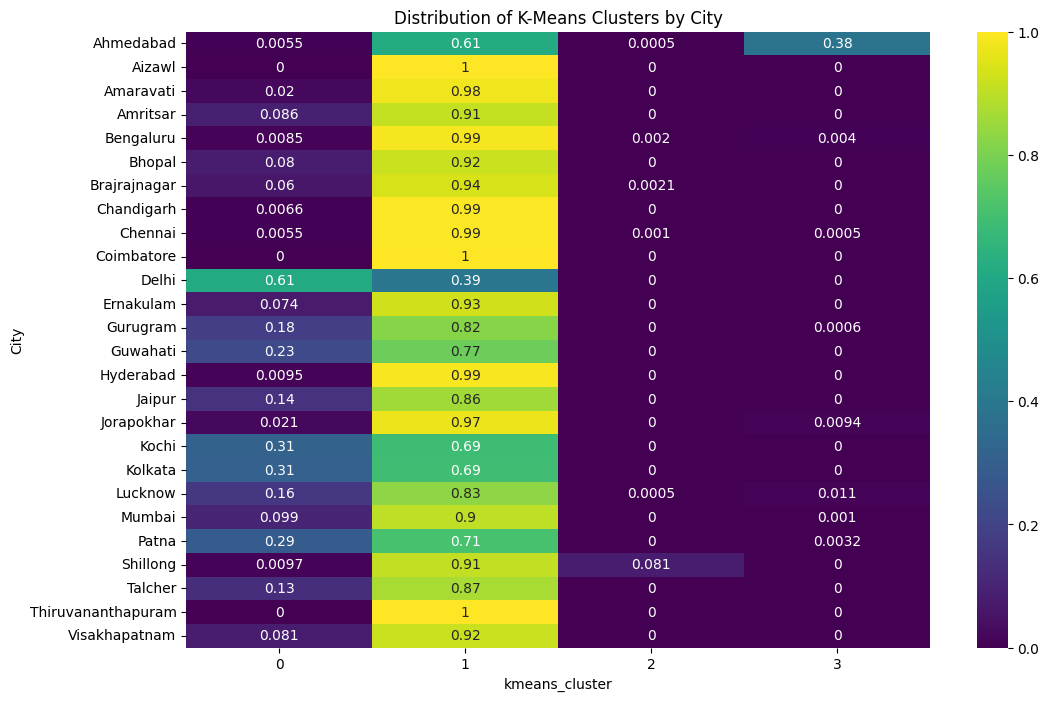

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# See which cities are most frequently in each cluster
city_cluster_distribution = df.groupby('City')['kmeans_cluster'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(city_cluster_distribution, annot=True, cmap='viridis')
plt.title('Distribution of K-Means Clusters by City')
plt.show()